# Kaggle Competition - Season 4 Episode 11

## Initial look at data

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
og = pd.read_csv('./final_depression_dataset_1.csv')
train.head()

id      Name  Gender   Age           City Working Professional or Student  \
0   0  Aaradhya  Female  49.0       Ludhiana            Working Professional   
1   1     Vivan    Male  26.0       Varanasi            Working Professional   
2   2    Yuvraj    Male  33.0  Visakhapatnam                         Student   
3   3    Yuvraj    Male  22.0         Mumbai            Working Professional   
4   4      Rhea  Female  30.0         Kanpur            Working Professional   

         Profession  Academic Pressure  Work Pressure  CGPA  \
0              Chef                NaN            5.0   NaN   
1           Teacher                NaN            4.0   NaN   
2               NaN                5.0            NaN  8.97   
3           Teacher                NaN            5.0   NaN   
4  Business Analyst                NaN            1.0   NaN   

   Study Satisfaction  Job Satisfaction     Sleep Duration Dietary Habits  \
0                 NaN               2.0  More than 8 hours        Healthy   
1                 NaN               3.0  Less than 5 hours      Unhealthy   
2                 2.0               NaN          5-6 hours        Healthy   
3                 NaN               1.0  Less than 5 hours       Moderate   
4                 NaN               1.0          5-6 hours      Unhealthy   

    Degree Have you ever had suicidal thoughts ?  Work/Study Hours  \
0      BHM                                    No               1.0   
1      LLB                                   Yes               7.0   
2  B.Pharm                                   Yes               3.0   
3      BBA                                   Yes              10.0   
4      BBA                                   Yes               9.0   

   Financial Stress Family History of Mental Illness  Depression  
0               2.0                               No           0  
1               3.0                               No           1  
2               1.0                               No           1  
3               1.0                              Yes           1  
4               4.0                              Yes           0

In [92]:
print(f'Size of train data: {train.shape}')
print(f'Size of test data: {test.shape}')
print(f'Size of og data: {og.shape}')

Size of train data: (140700, 20)
Size of test data: (93800, 19)
Size of og data: (2556, 19)


Checking for unique values for every feature

In [93]:
unique_vals_df = pd.DataFrame({'train': train.nunique(), 'test': test.nunique(), 'og': og.nunique()})
unique_vals_df

train     test     og
Academic Pressure                           5      5.0    5.0
Age                                        43     44.0   43.0
CGPA                                      331    326.0  312.0
City                                       98     68.0   30.0
Degree                                    115     87.0   27.0
Depression                                  2      NaN    2.0
Dietary Habits                             23     22.0    3.0
Family History of Mental Illness            2      2.0    2.0
Financial Stress                            5      5.0    5.0
Gender                                      2      2.0    2.0
Have you ever had suicidal thoughts ?       2      2.0    2.0
Job Satisfaction                            5      5.0    5.0
Name                                      422    374.0  216.0
Profession                                 64     64.0   35.0
Sleep Duration                             36     31.0    4.0
Study Satisfaction                          5      5.0    5.0
Work Pressure                               5      5.0    5.0
Work/Study Hours                           13     13.0   13.0
Working Professional or Student             2      2.0    2.0
id                                     140700  93800.0    NaN

In [94]:
dropping_cols = ['id','Name', 'Academic Pressure', 'CGPA', 'Study Satisfaction']  #Removed the last three features since they have a lot of missing values
# Check if columns exist in the dataframe before dropping them to safegaurd against repeated runs
dropping_cols = [col for col in dropping_cols if col in train.columns]
train.drop(dropping_cols, inplace=True, axis=1)
test.drop(dropping_cols, inplace=True, axis=1)
og.drop(dropping_cols[1:], inplace=True, axis=1)

Create a copy of the dataframe

In [95]:
temp_og = og.copy()
temp_test = test.copy()
temp_train = train.copy()

In [96]:
train.isnull().sum()

Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               36630
Work Pressure                            27918
Job Satisfaction                         27910
Sleep Duration                               0
Dietary Habits                               4
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             4
Family History of Mental Illness             0
Depression                                   0
dtype: int64

## Explore the data

### Clean features

##### For degree

In [97]:
import re

# We need to clean this list
def clean_string(input_string):
    return re.sub(r'[^a-z0-9]', '', str(input_string).lower())

og_degree_list = og['Degree'].unique()
og_degree_list = [clean_string(x) for x in og_degree_list]

In [98]:
# Now, I will first clean the Degree column in the train and test dataframes
train['Degree'] = train['Degree'].apply(lambda x: clean_string(x))
test['Degree'] = test['Degree'].apply(lambda x: clean_string(x))
og['Degree'] = og['Degree'].apply(lambda x: clean_string(x))

#Now, I will replace the values in the Degree column in the train and test dataframes with null values if they are not in the final_degree_list
train['Degree'] = train['Degree'].apply(lambda x: x if x in og_degree_list else None)
test['Degree'] = test['Degree'].apply(lambda x: x if x in og_degree_list else None)
og['Degree'] = og['Degree'].apply(lambda x: x if x in og_degree_list else None)

##### For Profession

In [115]:
og_profession_list = set(og['Profession'].unique())
og_profession_list = {clean_string(x) for x in og_profession_list}

# Now, I will first clean the Profession column in the train and test dataframes
train['Profession'] = train['Profession'].apply(lambda x: clean_string(x))
test['Profession'] = test['Profession'].apply(lambda x: clean_string(x))
og['Profession'] = og['Profession'].apply(lambda x: clean_string(x))

#Now, I will replace the values in the Profession column in the train and test dataframes with null values if they are not in the og_profession_list
train['Profession'] = train['Profession'].apply(lambda x: x if x in og_profession_list else None)
test['Profession'] = test['Profession'].apply(lambda x: x if x in og_profession_list else None)

##### Age

In [100]:
# Convert the 'Age' column in the 'train' dataframe to integer type
train['Age'] = train['Age'].astype(int)
test['Age'] = test['Age'].astype(int)
og['Age'] = og['Age'].astype(int)

##### City

In [101]:
#Lets check the city now
#Since we reliably know that the citys in og dataset are correct, we check for the ones that are not present

# exclusive_train_city_list = train['City'].unique()[~np.isin(train['City'].unique(), og['City'].unique())]
# exclusive_test_city_list = test['City'].unique()[~np.isin(test['City'].unique(), og['City'].unique())]
#We didnt include them since they were mostly fabricated
final_city_list = set(og['City'].unique()).union(['Gurgaon'])

#Now, I will first clean the City column in the train and test dataframes
train['City'] = train['City'].apply(lambda x: x if x in final_city_list else None)
test['City'] = test['City'].apply(lambda x: x if x in final_city_list else None)
og['City'] = og['City'].apply(lambda x: x if x in final_city_list else None)

##### Sleep duration

In [102]:
og_sleep_list = og['Sleep Duration'].unique()

#Now, I will replace the values in the Sleep Duration column in the train and test dataframes with null values if they are not in the og_sleep_list
train['Sleep Duration'] = train['Sleep Duration'].apply(lambda x: x if x in og_sleep_list else None)
test['Sleep Duration'] = test['Sleep Duration'].apply(lambda x: x if x in og_sleep_list else None)

##### Dietary Habits

In [103]:
#Now, I will replace the values in the Sleep Duration column in the train and test dataframes with null values if they are not in the og_sleep_list

og_diet_list = og['Dietary Habits'].unique()

#Now, I will replace the values in the Dietary Habits column in the train and test dataframes with null values if they are not in the og_diet_list
train['Dietary Habits'] = train['Dietary Habits'].apply(lambda x: x if x in og_diet_list else None)
test['Dietary Habits'] = test['Dietary Habits'].apply(lambda x: x if x in og_diet_list else None)

##### Coverting binary cat cols to boolean

In [104]:
train.rename(columns={'Have you ever had suicidal thoughts ?' : 'Suicidal Thoughts', 'Gender' : 'is_male', 'Working Professional or Student' : 'is_student', 'Family History of Mental Illness' : 'history_mental_illness' }, inplace=True)

test.rename(columns={'Have you ever had suicidal thoughts ?' : 'Suicidal Thoughts', 'Gender' : 'is_male', 'Working Professional or Student' : 'is_student', 'Family History of Mental Illness' : 'history_mental_illness' }, inplace=True)

og.rename(columns={'Have you ever had suicidal thoughts ?' : 'Suicidal Thoughts', 'Gender' : 'is_male', 'Working Professional or Student' : 'is_student', 'Family History of Mental Illness' : 'history_mental_illness' }, inplace=True)

In [105]:
#Now convert binary cat cols to 0 and 1
train['Suicidal Thoughts'] = train['Suicidal Thoughts'].apply(lambda x: 1 if x == 'Yes' else 0)
test['Suicidal Thoughts'] = test['Suicidal Thoughts'].apply(lambda x: 1 if x == 'Yes' else 0)
og['Suicidal Thoughts'] = og['Suicidal Thoughts'].apply(lambda x: 1 if x == 'Yes' else 0)

train['is_male'] = train['is_male'].apply(lambda x : 1 if x == 'Male' else 0)
test['is_male'] = test['is_male'].apply(lambda x : 1 if x == 'Male' else 0)
og['is_male'] = og['is_male'].apply(lambda x : 1 if x == 'Male' else 0)

train['is_student'] = train['is_student'].apply(lambda x : 1 if x == 'Student' else 0)
test['is_student'] = test['is_student'].apply(lambda x : 1 if x == 'Student' else 0)
og['is_student'] = og['is_student'].apply(lambda x : 1 if x == 'Student' else 0)

train['history_mental_illness'] = train['history_mental_illness'].apply(lambda x : 1 if x == 'Yes' else 0)
test['history_mental_illness'] = test['history_mental_illness'].apply(lambda x : 1 if x == 'Yes' else 0)
og['history_mental_illness'] = og['history_mental_illness'].apply(lambda x : 1 if x == 'Yes' else 0)

### Missing values

In [106]:
#Dataframe of missing values
#Checking missing values
missing_vals_df = pd.DataFrame({'train': train.isnull().sum().loc[train.isnull().sum()> 0], 
                                'test': test.isnull().sum().loc[test.isnull().sum()> 0], 
                                'og': og.isnull().sum().loc[og.isnull().sum()> 0]
                                })

missing_vals_df

train     test     og
City                 97     50.0    NaN
Degree              101     67.0    NaN
Dietary Habits       27     30.0    NaN
Financial Stress      4      NaN    NaN
Job Satisfaction  27910  18774.0  502.0
Profession           50     44.0  673.0
Sleep Duration       79     54.0    NaN
Work Pressure     27918  18778.0  502.0

Check the nature of these cols

- Degree - Categorical
- Profession - Categorical
- Work pressure - Numerical
- Job satisfaction - Numerical
- Dietary Habits - Categorical
- Financial Stress - Numerical    


Redundancy to check for enough records after dropping missing values

In [107]:
#Check whether there are enough records to train the model
# train_without_names = train.drop(['Name', 'id'], axis=1)
# number_of_duplicates = train_without_names.duplicated().sum()

#### Drop missing value entries with low frequency

Degree, Dietary Habits, Financial Stress have low missing values. These can be dropped.

In [108]:
low_missing_cols = ['Degree', 'Dietary Habits', 'Financial Stress', 'City', 'Sleep Duration']
low_missing_cols_train = [col for col in low_missing_cols if col in train.columns]
low_missing_cols_test = [col for col in low_missing_cols if col in train.columns]
train = train.dropna(subset=low_missing_cols)
test = test.dropna(subset=low_missing_cols)

#### Dealing with missing value entries with high frequency

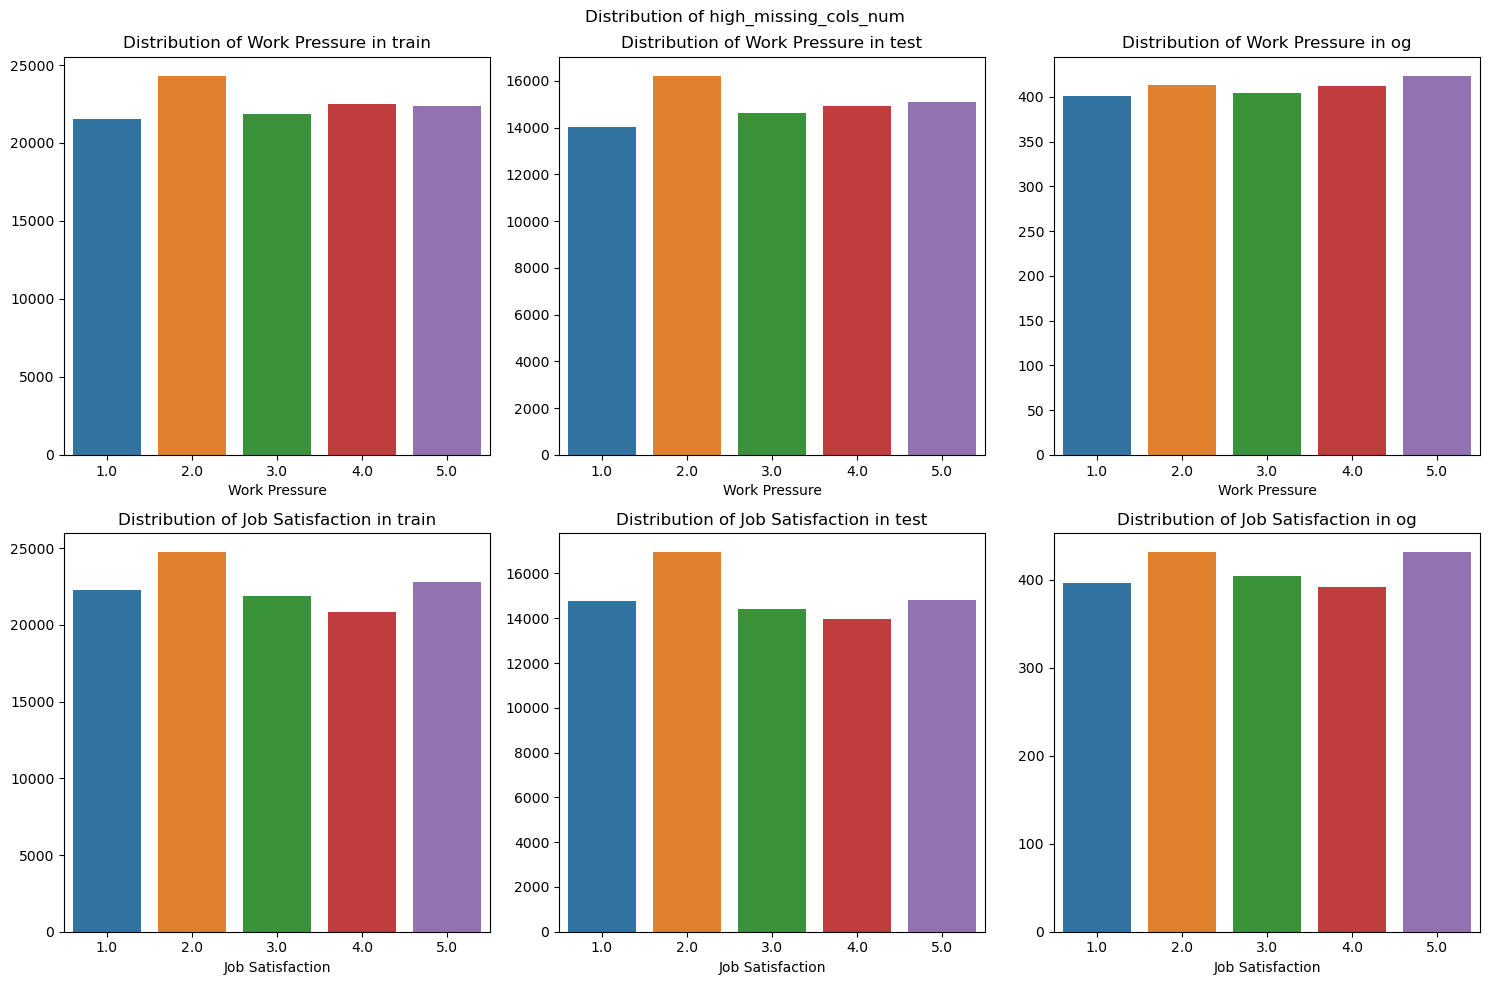

In [110]:
#Derive high missing frequency cols
high_missing_cols= ['Work Pressure', 'Job Satisfaction', 'Profession']
datasets_to_vizualize = ['train', 'test', 'og']

#There are three high_missing_cols_num and two datasets to visualize
#I want to zip them such that for every high_missing_cols_num, I can visualize the distribution in the three datasets
fig,ax = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of high_missing_cols_num')
# Iterate over each column and dataset
for i, col in enumerate(high_missing_cols[:2]):
    for j, dataset in enumerate(datasets_to_vizualize):
        # plt.title(f'Distribution of {col} in {dataset}')
        ax[i, j].set_title(f'Distribution of {col} in {dataset}')
        df = eval(dataset)
        sns.barplot(data = df, x = df[col].value_counts().index, y = df[col].value_counts().values, ax=ax[i, j])
plt.tight_layout()

In [116]:
#I want to maintain the distribution of the data during imputationṣ

is_male  Age       City  is_student       Profession  Work Pressure  \
2284        0   55  Bangalore           0     entrepreneur            4.0   
1918        0   18    Lucknow           1              nan            NaN   
1157        1   27       Agra           1              nan            NaN   
2079        0   31     Rajkot           0  researchanalyst            4.0   
480         0   20     Nagpur           0              nan            4.0   

      Job Satisfaction     Sleep Duration Dietary Habits   Degree  \
2284               1.0          5-6 hours      Unhealthy      bba   
1918               NaN          7-8 hours       Moderate  class12   
1157               NaN          7-8 hours        Healthy    btech   
2079               2.0  Less than 5 hours        Healthy      bba   
480                5.0          7-8 hours        Healthy  class12   

      Suicidal Thoughts  Work/Study Hours  Financial Stress  \
2284                  1                 9                 1   
1918                  0                 4                 1   
1157                  1                 8                 1   
2079                  0                10                 1   
480                   0                 2                 3   

      history_mental_illness Depression  
2284                       1         No  
1918                       1         No  
1157                       0        Yes  
2079                       1         No  
480                        1         No